In [110]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.graph_objs as graph
import plotly.tools as tls
import seaborn as sns
# !conda install geopandas
# import geopandas as gpd 

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


In [111]:
base=pd.read_csv('base_info.csv')
geo=pd.read_csv('name_geographic_information.csv')
salary=pd.read_csv('net_salary_per_town_categories.csv')
pop=pd.read_csv('population.csv')

# geography_map = gpd.read_file('departements.geojson')
# home_map = gpd.read_file('communes.geojson')

In [139]:
pop.describe()

,MOCO,AGEQ80_17,SEXE,NB
count,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06
mean,2.171378e+01,3.999966e+01,1.5,5.660564e+00
std,7.591484e+00,2.449493e+01,0.5,9.803689e+01
min,1.100000e+01,0.000000e+00,1.0,0.000000e+00
25%,1.200000e+01,2.000000e+01,1.0,0.000000e+00
50%,2.200000e+01,4.000000e+01,1.0,0.000000e+00
75%,3.100000e+01,6.000000e+01,2.0,0.000000e+00
max,3.200000e+01,8.000000e+01,2.0,2.129400e+04


In [112]:
geo.head()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


In [113]:
base.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [114]:
geo.describe()

,code_région,numéro_circonscription,code_insee,latitude,éloignement
count,36840.000000,36840.000000,36840.000000,33911.000000,33878.000000
mean,49.409881,3.818594,46298.368621,47.000659,1.471278
std,25.475629,3.042461,25529.124657,2.209990,0.558343
min,1.000000,1.000000,1001.000000,41.391667,-1.000000
25%,25.000000,2.000000,24576.750000,45.216667,1.140000
50%,43.000000,3.000000,48190.500000,47.433333,1.480000
75%,73.000000,5.000000,67043.250000,48.850000,1.820000
max,94.000000,24.000000,97617.000000,51.083333,3.000000


In [115]:
base.describe()

,REG,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
count,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000
mean,49.415365,123.456067,83.555301,27.291486,5.220550,3.800333,2.296448,0.738339,0.332434,0.172760,0.048417
std,25.451207,2353.384846,1729.874812,432.062116,83.685519,60.961216,32.597382,9.882131,4.850211,2.783668,1.091031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,8.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,19.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,54.000000,39.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,427385.000000,316603.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000


In [116]:
# remove LIBGEO column because of utf-8 errors
pop.head()

,NIVGEO,CODGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,11,0,1,15
1,COM,1001,11,0,2,15
2,COM,1001,11,5,1,20
3,COM,1001,11,5,2,20
4,COM,1001,11,10,1,20


# Clean Data 

In [151]:
# merge data using CODGEO & code_insee
# geo.drop_duplicates(subset=['code_insee'], keep='first', inplace=True)

base['CODGEO'] = base['CODGEO'].astype(str)
salary['CODGEO'] = salary['CODGEO'].astype(str)
geo['code_insee'] = geo['code_insee'].astype(str)
pop['CODGEO'] = pop['CODGEO'].astype(str)

merge_geo = base.merge(geo,left_on='CODGEO', right_on='code_insee')
merge_sal = merge_geo.merge(salary, on='CODGEO')
merge_pop = merge_sal.merge(pop, on='CODGEO',how='inner')

merge_pop.values.shape

(28031, 58)

In [153]:
merge_pop.values.shape

(28031, 58)

In [154]:
merge_pop.columns

Index(['CODGEO', 'LIBGEO_x', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500', 'EU_circo', 'code_région', 'nom_région', 'chef.lieu_région',
       'numéro_département', 'nom_département', 'préfecture',
       'numéro_circonscription', 'nom_commune', 'codes_postaux', 'code_insee',
       'latitude', 'longitude', 'éloignement', 'LIBGEO_y', 'SNHM14', 'SNHMC14',
       'SNHMP14', 'SNHME14', 'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14',
       'SNHMFE14', 'SNHMFO14', 'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14',
       'SNHMHO14', 'SNHM1814', 'SNHM2614', 'SNHM5014', 'SNHMF1814',
       'SNHMF2614', 'SNHMF5014', 'SNHMH1814', 'SNHMH2614', 'SNHMH5014',
       'NIVGEO', 'MOCO', 'AGEQ80_17', 'SEXE', 'NB'],
      dtype='object')

In [197]:
# drop redundant columns that will not be needed for analysis
data = merge_pop.drop(columns=['LIBGEO_x', 'REG', 'DEP','EU_circo', 'code_région', 'nom_région', 'chef.lieu_région',
'numéro_département', 'nom_département', 'préfecture','numéro_circonscription','codes_postaux', 'code_insee',
                            'éloignement', 'LIBGEO_y','NIVGEO','MOCO','AGEQ80_17','SEXE'])

In [198]:
data.columns

Index(['CODGEO', 'E14TST', 'E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10',
       'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500', 'nom_commune',
       'latitude', 'longitude', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 'NB'],
      dtype='object')

In [199]:
groupby_columns = list(data.columns[:-4])
df = data.reset_index().groupby(groupby_columns, as_index= False).sum()

In [200]:
# df=merge_sal.drop(columns=['index'])
df.columns

Index(['CODGEO', 'E14TST', 'E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10',
       'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500', 'nom_commune',
       'latitude', 'longitude', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014', 'index',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 'NB'],
      dtype='object')

In [201]:
df.head()

,CODGEO,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,...,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,index,SNHMH1814,SNHMH2614,SNHMH5014,NB
0,10003,140,93,37,5,4,1,0,0,0,...,11.1,12.2,9.1,10.3,10.5,28203,2308.6,2784.6,3165.4,3440
1,10006,203,113,62,11,8,7,2,0,0,...,11.4,13.1,8.8,10.4,11.8,84847,2284.8,2832.2,3260.6,2708
2,10033,397,212,130,24,17,7,3,3,1,...,11.2,13.1,8.9,10.3,10.9,141491,2308.6,2832.2,3498.6,4704
3,10034,273,144,89,17,16,4,3,0,0,...,10.8,13.8,8.5,10.5,11.1,198135,2213.4,2641.8,3760.4,2785
4,10060,147,80,33,13,13,6,1,1,0,...,13.4,14.5,9.1,12.3,12.5,254779,2403.8,3379.6,3903.2,2499


In [202]:
df.values.shape

(113, 40)

In [203]:
df['Micro_firms'] = df['E14TS1'] + df['E14TS6']
df['Small_firms'] = df['E14TS10'] + df['E14TS20']
df['Medium_firms'] = df['E14TS50'] + df['E14TS100']
df['Large_firms'] = df['E14TS200'] + df['E14TS500']
df = df.drop(columns=['E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10','E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500','E14TS0ND'])
df = df.rename(columns = {'E14TST':'total_firms','NB':'total_population','nom_commune':'Town'})

In [204]:
df.columns

Index(['CODGEO', 'total_firms', 'Town', 'latitude', 'longitude', 'SNHM14',
       'SNHMC14', 'SNHMP14', 'SNHME14', 'SNHMO14', 'SNHMF14', 'SNHMFC14',
       'SNHMFP14', 'SNHMFE14', 'SNHMFO14', 'SNHMH14', 'SNHMHC14', 'SNHMHP14',
       'SNHMHE14', 'SNHMHO14', 'SNHM1814', 'SNHM2614', 'SNHM5014', 'SNHMF1814',
       'SNHMF2614', 'SNHMF5014', 'index', 'SNHMH1814', 'SNHMH2614',
       'SNHMH5014', 'total_population', 'Micro_firms', 'Small_firms',
       'Medium_firms', 'Large_firms'],
      dtype='object')

In [205]:
df=df.rename(columns = {'SNHM14':'mean_salary',
                      'SNHMC14':'mean_executive_salary',
                      'SNHMP14':'mean_middle_manager_salary',
                      'SNHME14':'mean_employee_salary',
                      'SNHMO14':'mean_worker_salary',
                      'SNHMF14':'mean_female_salary',
                      'SNHMFC14':'mean_female_executive_salary',
                      'SNHMFP14':'mean_female_middle_manager_salary',
                      'SNHMFE14':'mean_female_employee_salary',
                      'SNHMFO14':'mean_female_worker_salary',
                      'SNHMH14':'mean_male_salary',
                      'SNHMHC14':'mean_male_executive_salary',
                      'SNHMHP14':'mean_male_middle_manager_salary',
                      'SNHMHE14':'mean_male_employee_salary',
                      'SNHMHO14':'mean_male_worker_salary',
                      'SNHM1814':'mean_young_age_salary',
                      'SNHM2614':'mean_medium_age_salary',
                      'SNHM5014':'mean_old_age_salary',
                      'SNHMF1814':'mean_young_female_salary',
                      'SNHMF2614':'mean_medium_female_salary',
                      'SNHMF5014':'mean_old_female_salary',
                      'SNHMH1814':'mean_young_male_salary',
                      'SNHMH2614':'mean_medium_male_salary',
                      'SNHMH5014':'mean_old_male_salary',
                  })

In [206]:
df.columns

Index(['CODGEO', 'total_firms', 'Town', 'latitude', 'longitude', 'mean_salary',
       'mean_executive_salary', 'mean_middle_manager_salary',
       'mean_employee_salary', 'mean_worker_salary', 'mean_female_salary',
       'mean_female_executive_salary', 'mean_female_middle_manager_salary',
       'mean_female_employee_salary', 'mean_female_worker_salary',
       'mean_male_salary', 'mean_male_executive_salary',
       'mean_male_middle_manager_salary', 'mean_male_employee_salary',
       'mean_male_worker_salary', 'mean_young_age_salary',
       'mean_medium_age_salary', 'mean_old_age_salary',
       'mean_young_female_salary', 'mean_medium_female_salary',
       'mean_old_female_salary', 'index', 'mean_young_male_salary',
       'mean_medium_male_salary', 'mean_old_male_salary', 'total_population',
       'Micro_firms', 'Small_firms', 'Medium_firms', 'Large_firms'],
      dtype='object')

In [207]:
# save to separate csv 
df.to_csv("Cleaned_data.csv")

In [208]:
merge_geo.head()
data = [graph.Bar(
            x = merge_geo['nom_région'],
            y = merge_geo['E14TS500'],
    marker=dict(color='rgb(0, 83, 230)'))]

layout = graph.Layout(
    title='Regions number of big industries (>500)'
)

fig = graph.Figure(data=data, layout=layout)

py.iplot(fig)

In [209]:
merge_geo.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,...,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,10002,Ailleville,21,10,1,1,0,0,0,0,...,10,Aube,Troyes,1,Ailleville,10200,10002,48.250000,4.683333,1.83
1,10003,Aix-en-Othe,21,10,140,93,37,5,4,1,...,10,Aube,Troyes,2,Aix-en-Othe,10160,10003,48.216667,3.733333,1.61
2,10004,Allibaudières,21,10,14,12,1,0,1,0,...,10,Aube,Troyes,1,Allibaudières,10700,10004,48.583333,4.116667,1.96
3,10005,Amance,21,10,7,5,1,0,0,1,...,10,Aube,Troyes,1,Amance,10140,10005,48.300000,4.516667,1.23
4,10006,Arcis-sur-Aube,21,10,203,113,62,11,8,7,...,10,Aube,Troyes,1,Arcis-sur-Aube,10700,10006,48.533333,4.133333,1.61


In [210]:
df2 = pd.read_csv("Cleaned_data.csv")
df2.columns

Index(['Unnamed: 0', 'CODGEO', 'total_firms', 'Town', 'latitude', 'longitude',
       'mean_salary', 'mean_executive_salary', 'mean_middle_manager_salary',
       'mean_employee_salary', 'mean_worker_salary', 'mean_female_salary',
       'mean_female_executive_salary', 'mean_female_middle_manager_salary',
       'mean_female_employee_salary', 'mean_female_worker_salary',
       'mean_male_salary', 'mean_male_executive_salary',
       'mean_male_middle_manager_salary', 'mean_male_employee_salary',
       'mean_male_worker_salary', 'mean_young_age_salary',
       'mean_medium_age_salary', 'mean_old_age_salary',
       'mean_young_female_salary', 'mean_medium_female_salary',
       'mean_old_female_salary', 'index', 'mean_young_male_salary',
       'mean_medium_male_salary', 'mean_old_male_salary', 'total_population',
       'Micro_firms', 'Small_firms', 'Medium_firms', 'Large_firms'],
      dtype='object')

In [211]:
df2.columns

Index(['Unnamed: 0', 'CODGEO', 'total_firms', 'Town', 'latitude', 'longitude',
       'mean_salary', 'mean_executive_salary', 'mean_middle_manager_salary',
       'mean_employee_salary', 'mean_worker_salary', 'mean_female_salary',
       'mean_female_executive_salary', 'mean_female_middle_manager_salary',
       'mean_female_employee_salary', 'mean_female_worker_salary',
       'mean_male_salary', 'mean_male_executive_salary',
       'mean_male_middle_manager_salary', 'mean_male_employee_salary',
       'mean_male_worker_salary', 'mean_young_age_salary',
       'mean_medium_age_salary', 'mean_old_age_salary',
       'mean_young_female_salary', 'mean_medium_female_salary',
       'mean_old_female_salary', 'index', 'mean_young_male_salary',
       'mean_medium_male_salary', 'mean_old_male_salary', 'total_population',
       'Micro_firms', 'Small_firms', 'Medium_firms', 'Large_firms'],
      dtype='object')

In [212]:
df2.head()

,Unnamed: 0,CODGEO,total_firms,Town,latitude,longitude,mean_salary,mean_executive_salary,mean_middle_manager_salary,mean_employee_salary,...,mean_old_female_salary,index,mean_young_male_salary,mean_medium_male_salary,mean_old_male_salary,total_population,Micro_firms,Small_firms,Medium_firms,Large_firms
0,0,10003,140,Aix-en-Othe,48.216667,3.733333,11.2,20.2,12.8,9.5,...,10.5,28203,2308.6,2784.6,3165.4,3440,42,5,0,0
1,1,10006,203,Arcis-sur-Aube,48.533333,4.133333,11.6,19.3,14.8,9.6,...,11.8,84847,2284.8,2832.2,3260.6,2708,73,15,2,0
2,2,10033,397,Bar-sur-Aube,48.233333,4.716667,11.6,21.4,14.1,10.2,...,10.9,141491,2308.6,2832.2,3498.6,4704,154,24,6,1
3,3,10034,273,Bar-sur-Seine,48.116667,4.366667,11.4,24.2,12.7,9.5,...,11.1,198135,2213.4,2641.8,3760.4,2785,106,20,3,0
4,4,10060,147,Bréviandes,48.250000,4.100000,13.4,23.0,15.5,10.5,...,12.5,254779,2403.8,3379.6,3903.2,2499,46,19,2,0


In [213]:
top_10_firms=df2.nlargest(10,'total_firms').reset_index()
top_10_firms[['Town','total_firms']]

,Town,total_firms
0,Marseille,68332
1,Aix-en-Provence,17626
2,Narbonne,5237
3,Aubagne,4766
4,Carcassonne,4338
5,Arles,4320
6,Troyes,3856
7,La Ciotat,3473
8,Martigues,3034
9,Istres,2462


,level_0,Unnamed: 0,CODGEO,total_firms,Town,latitude,longitude,mean_salary,mean_executive_salary,mean_middle_manager_salary,...,mean_old_female_salary,index,mean_young_male_salary,mean_medium_male_salary,mean_old_male_salary,total_population,Micro_firms,Small_firms,Medium_firms,Large_firms
0,108,108,13055,68332,Marseille,43.300000,5.400000,13.8,23.8,14.6,...,14.0,6372331,2522.8,3403.4,4236.4,834137,16700,2507,466,102
1,64,64,13001,17626,Aix-en-Provence,43.533333,5.433333,16.1,26.0,15.3,...,15.2,3879995,2475.2,4141.2,5783.4,134257,4411,961,178,36
2,31,31,11262,5237,Narbonne,43.183333,3.000000,12.2,21.8,13.9,...,12.7,1897455,2261.0,2975.0,3784.2,51663,1475,272,43,5
3,68,68,13005,4766,Aubagne,43.283333,5.566667,13.4,23.8,14.6,...,13.6,4106571,2213.4,3355.8,4260.2,43115,1385,330,70,8
4,22,22,11069,4338,Carcassonne,43.216667,2.350000,11.8,22.3,13.3,...,12.7,1331015,2165.8,2856.0,3451.0,44330,1403,277,39,3


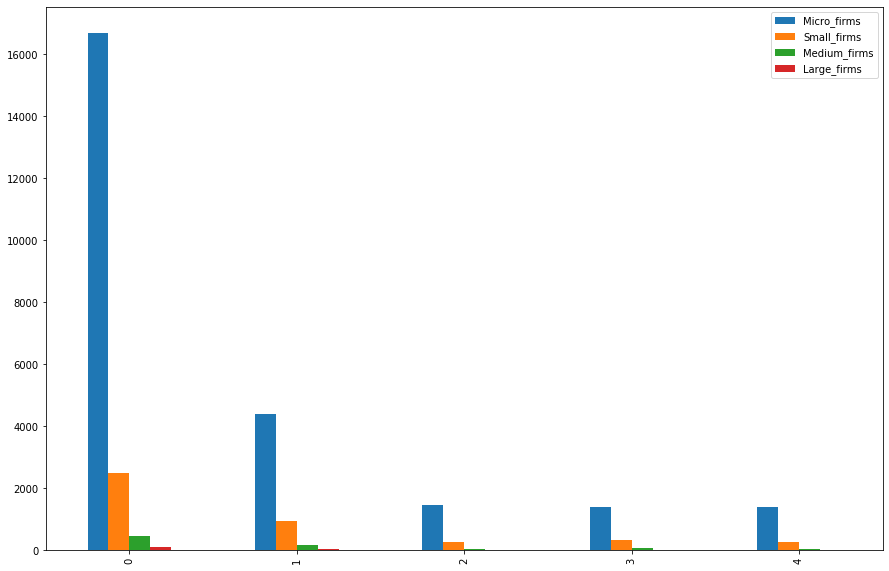

In [214]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
top_5_towns=top_10_firms.nlargest(5, 'total_firms')

top_5_towns.iloc[:,-4:].plot(kind='bar', ax=ax)
top_5_towns.head()
# top_5_towns.index=top5_towns.Town



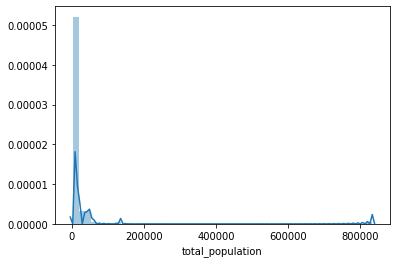

In [219]:
sns.distplot(df2.total_population)

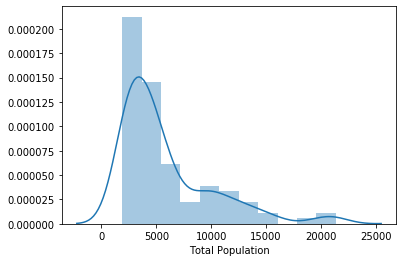

In [220]:
target2 = df2[df2.total_population < df2.total_population.quantile(0.9)]
sns.distplot(target2.total_population,axlabel='Total Population')

In [235]:
# Bottom 10 towns with the highest population

top10_population = df2.nlargest(5,'total_population')
top10_population = top10_population.reset_index()
top10_population[['Town','total_population']]

,Town,total_population
0,Marseille,834137
1,Aix-en-Provence,134257
2,Troyes,58769
3,Narbonne,51663
4,Arles,51663


In [236]:
# Bottom 5 towns with the lowest population

top10_population = df2.nsmallest(5,'total_population')
top10_population = top10_population.reset_index()
top10_population[['Town','total_population']]

,Town,total_population
0,Réquista,1883
1,Rieux-Minervois,1915
2,Rieupeyroux,1963
3,Le Monastère,2080
4,Salles-la-Source,2095


In [222]:
# correlation between total population vs total number of firms
df2['total_population'].corr(df2['total_firms'])

0.9947084703054838

In [223]:
df2.mean_salary.describe()

count    113.000000
mean      13.516814
std        2.136248
min       11.000000
25%       11.800000
50%       12.900000
75%       14.500000
max       20.100000
Name: mean_salary, dtype: float64

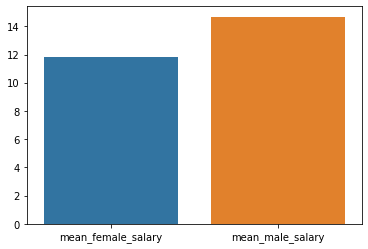

In [224]:
# plot mean salary of men vs women
sns.barplot(x=['mean_female_salary','mean_male_salary'],y=[df2.mean_female_salary.mean(),df2.mean_male_salary.mean()])

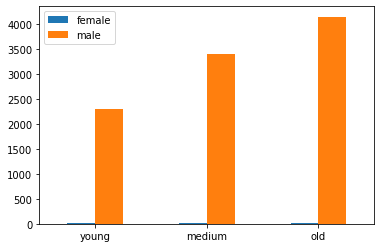

In [225]:
age_groups = pd.DataFrame([[df2.mean_young_female_salary.mean(),df2.mean_young_male_salary.mean()],
                   [df2.mean_medium_female_salary.mean(),df2.mean_medium_male_salary.mean()],
                   [df2.mean_old_female_salary.mean(),df2.mean_old_male_salary.mean()]],
                  columns=['female','male'],index=['young','medium','old'])
age_groups.plot.bar(rot=0)

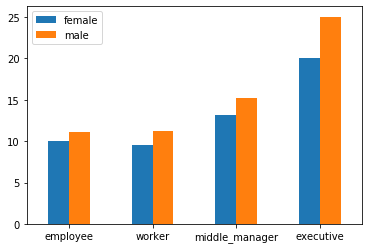

In [226]:
job_category = pd.DataFrame([[df2.mean_female_employee_salary.mean(),df2.mean_male_employee_salary.mean()],
                             [df2.mean_female_worker_salary.mean(),df2.mean_male_worker_salary.mean()],
                            [df2.mean_female_middle_manager_salary.mean(),df2.mean_male_middle_manager_salary.mean()],
                            [df2.mean_female_executive_salary.mean(),df2.mean_male_executive_salary.mean()]],
                            columns=['female','male'],index=['employee','worker','middle_manager','executive'])
job_category.plot.bar(rot=0)

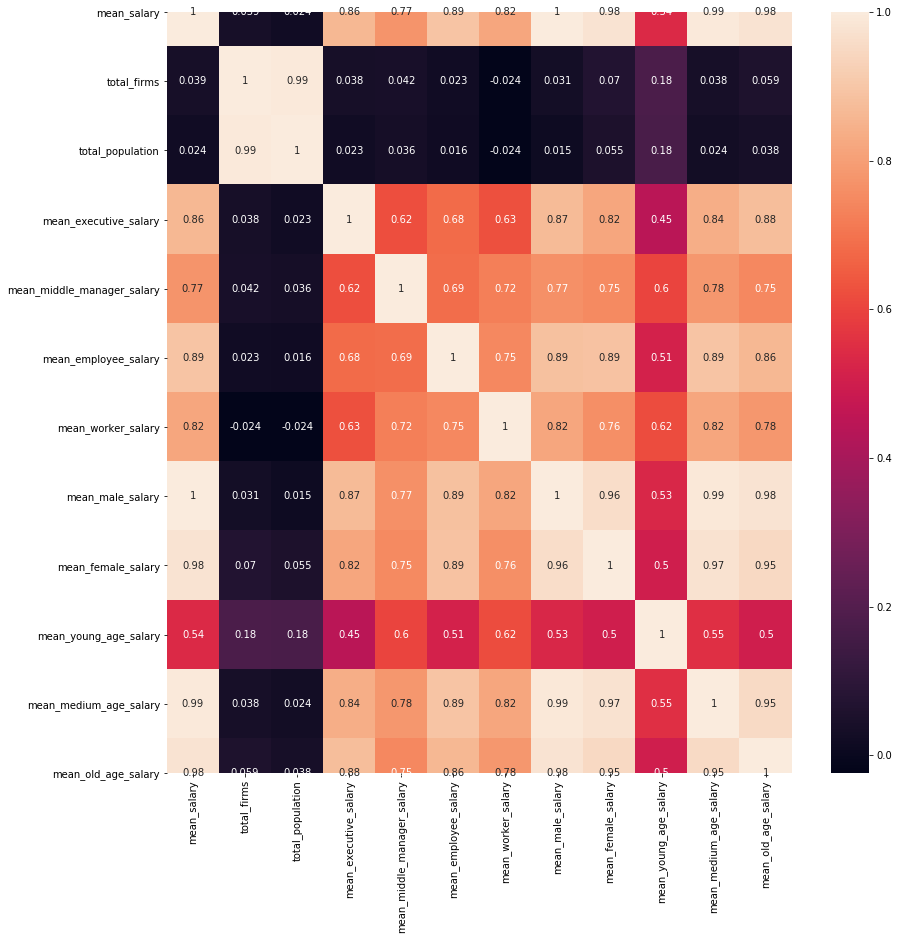

In [228]:
# heatmap of all columns
Target_fratures = df2[['mean_salary','total_firms','total_population','mean_executive_salary', 'mean_middle_manager_salary',
       'mean_employee_salary', 'mean_worker_salary','mean_male_salary','mean_female_salary',
                 'mean_young_age_salary','mean_medium_age_salary', 'mean_old_age_salary']]
corr = Target_fratures.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True)
plt.show()